> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: This data contains 110k appointments from different patients in brazil and we are going to check some characteristics  <br>
>**Q's:**<br>
>1-What gender usually attends the appointment date? <br>
>2-Does sending an SMS to patients make them more likely to attend the appointment?

>this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
%matplotlib inline
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
# Checking NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
ages=df['Age'].tolist()
ages
def uniquevalues (column_list):
    unival=set(column_list)
    return(unival)
uniquevalues(ages)


{-1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 102,
 115}

In [7]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [8]:
#checking duplicates
df[df.duplicated()]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [10]:
#
df=df[df['Age']>1]

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [11]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# convert dates from string to datetime
pd.to_datetime(df['ScheduledDay'])
pd.to_datetime(df['AppointmentDay'])

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 104714, dtype: datetime64[ns, UTC]

In [12]:
#Rename headers
df.columns=df.columns.str.lower()
df.rename(columns = {'no-show':'no_show','hipertension':'hypertension'},inplace=True)

C:\Users\friends\Desktop\fwd\env\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [13]:
df.drop('patientid',axis=1,inplace=True)
df.drop('appointmentid',axis=1,inplace=True)

C:\Users\friends\Desktop\fwd\env\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


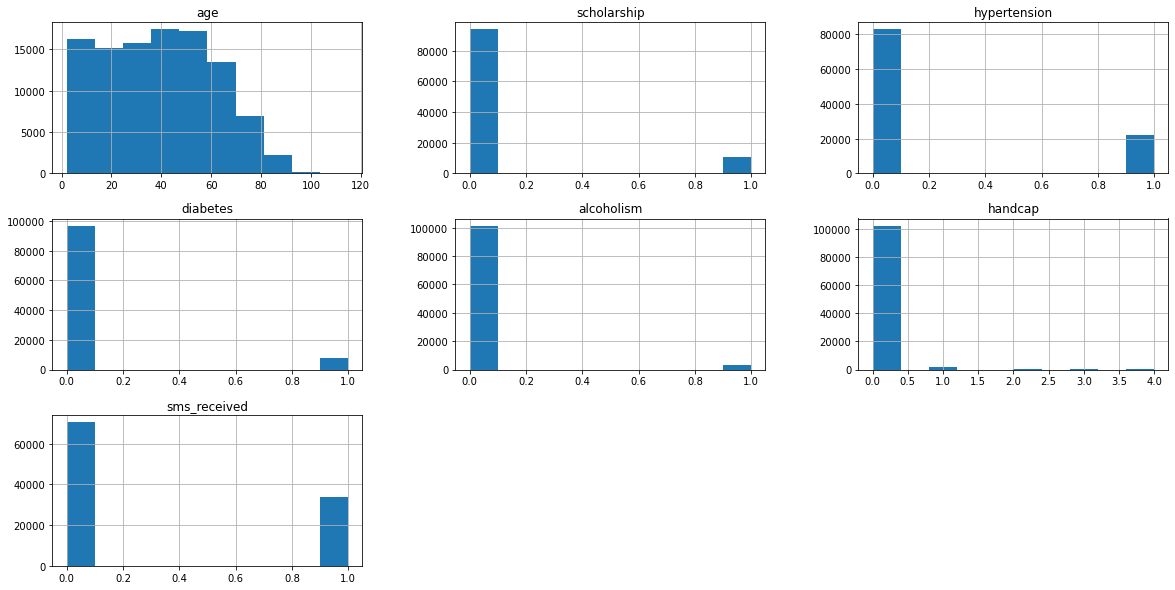

In [14]:
df.hist(figsize=(20, 10));

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Which genders usually attends?

In [15]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_gb_gn = df.groupby(['gender','no_show']).count()['age']
df_gb_gn

gender  no_show
F       No         54957
        Yes        14073
M       No         28492
        Yes         7192
Name: age, dtype: int64

In [16]:
#filterby gender & who  no_show 
df_f= df[df['gender'] == 'F']
#propotional females
all_f=df_f.count()['age']
no_showf=df_f[df_f['no_show'] == 'Yes'].count()['age']
fc=all_f/no_showf
#proportional males
df_m= df[df['gender'] == 'M']
all_m=df_m[df_m['gender'] == 'M'].count()['age']
no_showm=df_m[df_m['no_show'] == 'Yes'].count()['age']
mc= all_m/no_showm
counts=[fc,mc]
counts

[4.905137497335323, 4.961624026696329]

Text(0.5, 1.0, 'Counts of no_show / Gender')

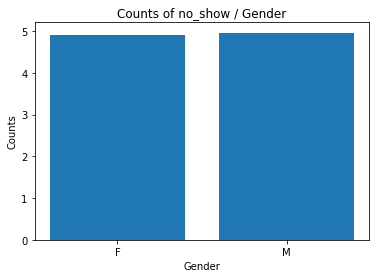

In [17]:
plt.bar([1,2],counts,tick_label=['F','M'])
plt.xlabel('Gender')
plt.ylabel('Counts')
plt.title('Counts of no_show / Gender')

### Does sending an sms matters?  

In [18]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
df_sms = df.groupby(['sms_received','no_show']).count()['age']
df_sms

sms_received  no_show
0             No         58807
              Yes        11888
1             No         24642
              Yes         9377
Name: age, dtype: int64

In [19]:
df_sms= df[df['sms_received'] == 1]
all_sms=df.count()['sms_received']
show_sms=df_sms[df_sms['no_show'] == 'No'].count()['age']
prop_sms=all_sms/show_sms
df_nosms= df[df['sms_received'] == 0]
show_nosms=df_nosms[df_nosms['no_show'] == 'No'].count()['age']
prop_nosms= all_sms/show_nosms
counts=[prop_sms,prop_nosms]
counts

[4.249411573735898, 1.7806383593789854]

Text(0.5, 1.0, 'Counts of no_show / SMS')

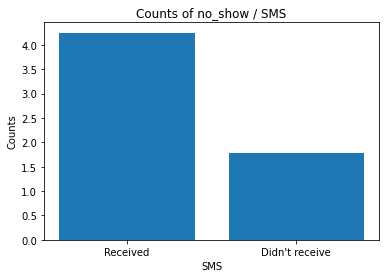

In [20]:
plt.bar([1,2],counts,tick_label=['Received','Didn\'t receive'])
plt.xlabel('SMS')
plt.ylabel('Counts')
plt.title('Counts of no_show / SMS')
#Patients who received sms message are more likely to attend appointment

In [21]:
df_drop=df[df['age']>1]# you can adjest it by making it >1
df_drop
        

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
110522,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [83]:
df_ns=df[df['no_show']=='Yes']
df_s=df[df['no_show']=='No']
df_nsd=df_ns.pivot_table(index = ['age'], aggfunc ='size')
df_sd=df_s.pivot_table(index = ['age'], aggfunc ='size')

6         Yes
7         Yes
11        Yes
17        Yes
20        Yes
         ... 
110484    Yes
110492    Yes
110496    Yes
110515    Yes
110516    Yes
Name: no_show, Length: 21265, dtype: object

In [68]:
#keys = ['a', 'b', 'c']
#values = [1, 2, 3]
#dictionary = dict(zip(keys, values))
list(df_sd);
list(set(df_s['age']));
dict_df_s= dict(zip(list(set(df_s['age'])),list(df_sd)))
dict_df_s;
list(df_nsd);
list(set(df_ns['age']));
dict_df_ns= dict(zip(list(set(df_ns['age'])),list(df_nsd)))
dict_df_ns;

In [77]:
#
ssd=[]
snsd=[]
for age in df_s['age']:
    for agek , dup in dict_df_s.items():
        if (age == agek):
            ssd.append(dup)
for age in df_ns['age']:
    for agek , dup in dict_df_ns.items():
        if (age == agek):
            snsd.append(dup)
len(ssd),len(snsd)

(83449, 21265)

Text(0.5, 1.0, 'no_show/age')

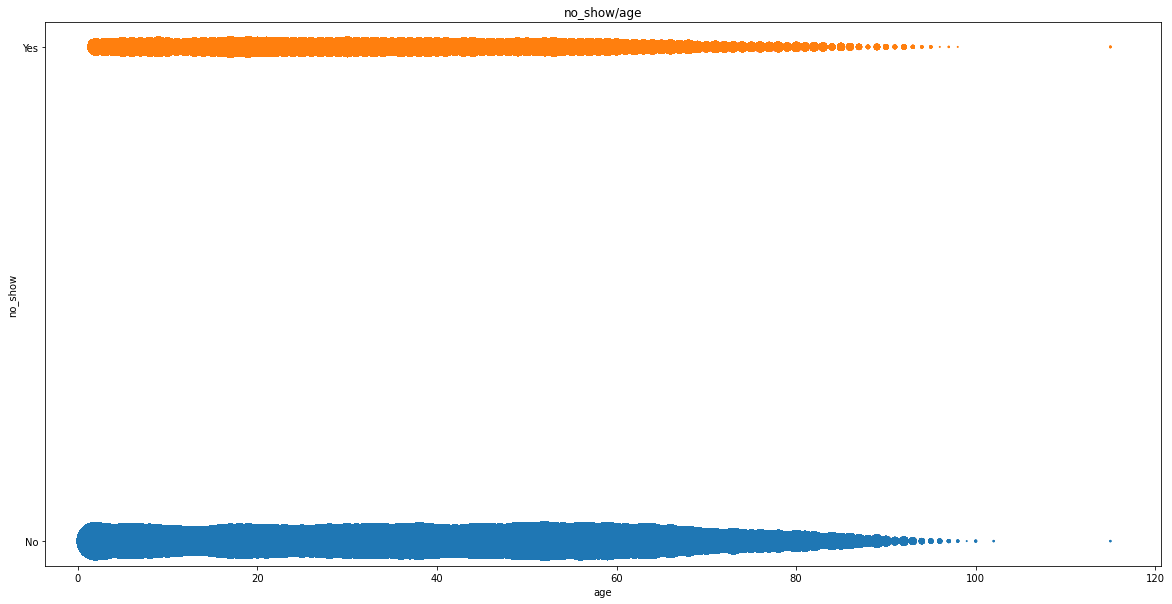

In [85]:
plt.figure(figsize=(20,10))
plt.scatter(df_s['age'],df_s['no_show'],s=ssd,label='attended')
plt.scatter(df_ns['age'],df_ns['no_show'],s=snsd,label='didn\'t attended')
plt.xlabel('age')
plt.ylabel('no_show')
plt.title('no_show/age')

<a id='conclusions'></a>
## Conclusions

> **Tip**: We can answers the questions of the introduction from the graphs above<br>
>As it shows above males and females both have the same absence proportions<br>
>Sending an SMS do increase the appointment attendence by 2x<br>

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1